In [436]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [437]:
traindf = pd.read_csv("Dataset/train.csv")

In [438]:
traindf.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [439]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [440]:
traindf.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee_ID,7000,7000,EID_23140,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,7000,2,F,4114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,6588,NaN,NaN,NaN,39.6228,13.6069,19,27,37,52,65
Education_Level,7000,NaN,NaN,NaN,3.18786,1.0651,1,3,3,4,5
Relationship_Status,7000,2,Married,4520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hometown,7000,5,Lebanon,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit,7000,12,IT,1394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision_skill_possess,7000,4,Conceptual,1756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_of_service,6856,NaN,NaN,NaN,13.3851,10.3642,0,5,10,21,43
Time_since_promotion,7000,NaN,NaN,NaN,2.36714,1.1494,0,1,2,3,4


In [441]:
testdf = pd.read_csv("Dataset/Test.csv")

In [442]:
testdf.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee_ID,3000,3000,EID_24277,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,3000,2,F,1728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2839,NaN,NaN,NaN,39.7978,13.5018,19,27,38,52,65
Education_Level,3000,NaN,NaN,NaN,3.22633,1.0659,1,3,3,4,5
Relationship_Status,3000,2,Married,1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hometown,3000,5,Lebanon,883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit,3000,12,IT,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision_skill_possess,3000,4,Behavioral,799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_of_service,2948,NaN,NaN,NaN,13.4037,10.1892,0,5,10,21,43
Time_since_promotion,3000,NaN,NaN,NaN,2.40533,1.15043,0,1,2,3,4


In [443]:
testdf.shape , traindf.shape

((3000, 23), (7000, 24))

In [444]:
datadf = pd.concat([traindf, testdf])

In [445]:
datadf.reset_index(drop=True, inplace=True)

In [446]:
datadf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee_ID,10000,10000,EID_22152,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,F,5842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,9427,NaN,NaN,NaN,39.6755,13.5749,19,27,38,52,65
Education_Level,10000,NaN,NaN,NaN,3.1994,1.06544,1,3,3,4,5
Relationship_Status,10000,2,Married,6461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hometown,10000,5,Lebanon,2953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit,10000,12,IT,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision_skill_possess,10000,4,Behavioral,2535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_of_service,9804,NaN,NaN,NaN,13.3907,10.3114,0,5,10,21,43
Time_since_promotion,10000,NaN,NaN,NaN,2.3786,1.14978,0,1,2,3,4


In [447]:
datadf.isna().sum()

Employee_ID                     0
Gender                          0
Age                           573
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [448]:
datadf.duplicated().sum()

0

In [449]:
datadf.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [450]:
matplotlib.rcParams["figure.figsize"] = (5,5)

<AxesSubplot:ylabel='Frequency'>

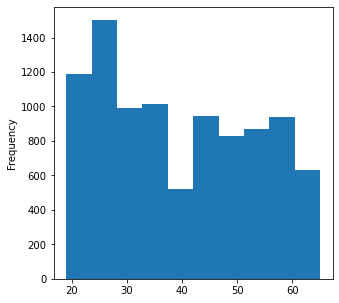

In [451]:
datadf['Age'].plot(kind='hist')

In [452]:
numeric_cols = datadf.select_dtypes(include=np.number).columns

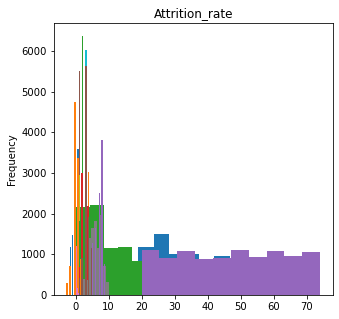

In [453]:
for col in numeric_cols:
    datadf[col].plot(kind='hist')
    plt.title(col)

ValueError: num must be 1 <= num <= 16, not 17

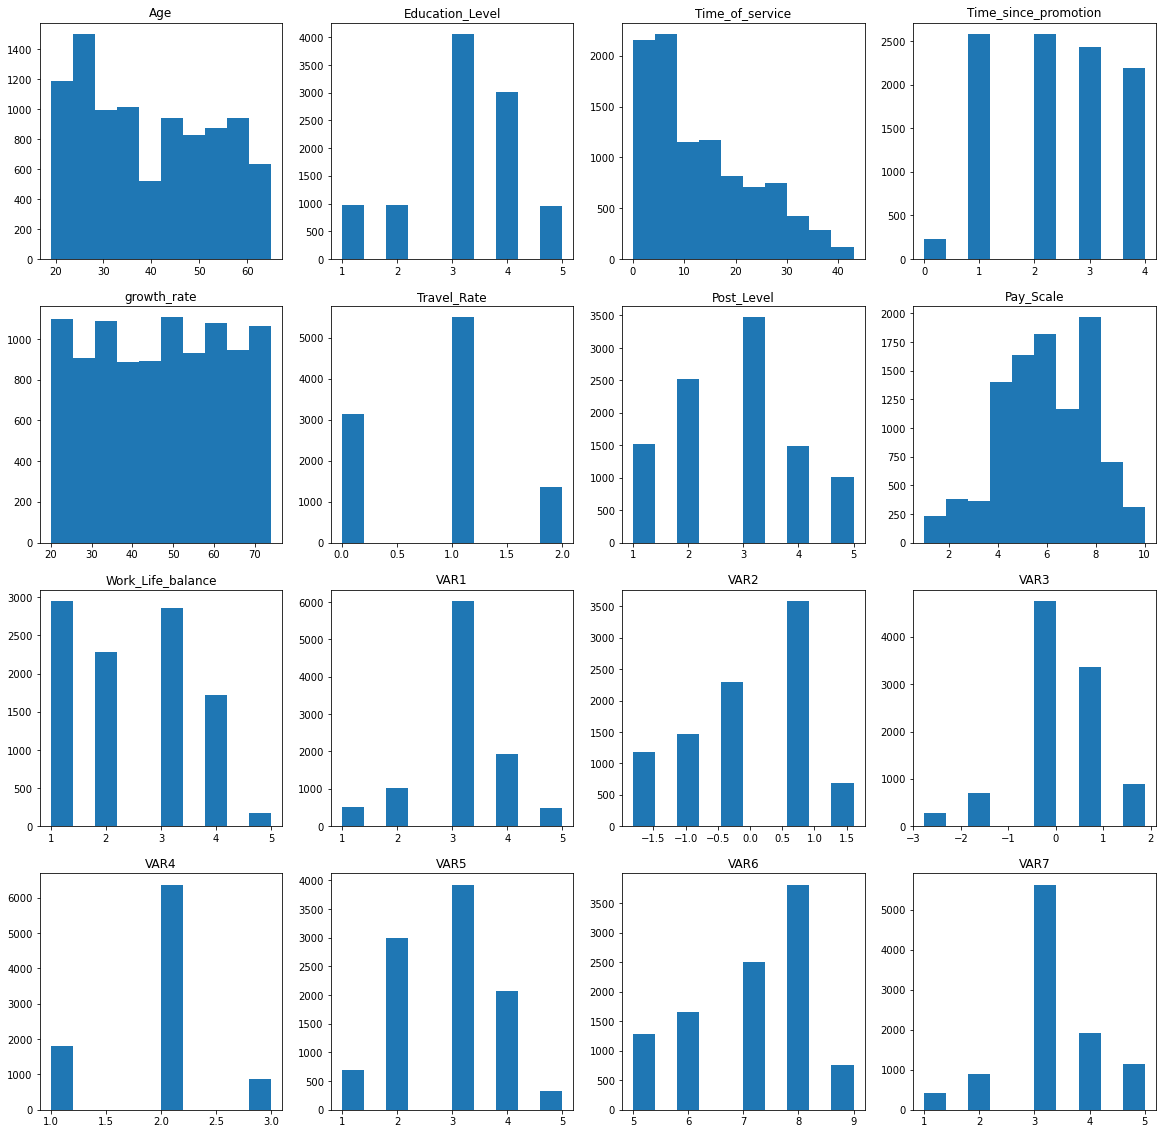

In [454]:
plt.subplots(4,4, figsize=(20,20))
i = 1
for col in numeric_cols:
    plt.subplot(4, 4, i)
    try:
        plt.hist(datadf[col])
        plt.title(col)
    finally:
        i += 1

In [ ]:
datadf.

In [ ]:
datadf.plot.line(x='Attrition_rate', y='Age',)

In [ ]:
sns.boxplot(x='Age', y='Attrition_rate', data=datadf)

In [ ]:
plt.scatter(datadf.Age, datadf.Attrition_rate)

In [ ]:
plt.scatter(datadf.Unit, datadf.Attrition_rate)

In [ ]:
sns.boxplot(x=datadf.Unit, y=datadf.Attrition_rate)

In [ ]:
datadf.Unit.value_counts()

In [ ]:
datadf.groupby('Unit').Attrition_rate.median()

In [ ]:
matplotlib.rcParams["figure.figsize"] = (40,30)

In [ ]:
sns.heatmap(datadf.corr(), annot=True)

In [ ]:
datadf.columns

In [ ]:
datadf.isna().sum()

In [ ]:
datadf['Age'] = datadf['Age'].fillna(datadf.groupby(['Time_of_service','Education_Level','Time_since_promotion'])['Age'].transform('median'))

In [ ]:
datadf['Time_of_service'] = datadf['Time_of_service'].fillna(datadf.groupby(['Age','Pay_Scale','Time_since_promotion'])['Time_of_service'].transform('median'))

In [ ]:
datadf['Pay_Scale'] = datadf['Pay_Scale'].fillna(datadf.groupby(['Post_Level','Work_Life_balance'])['Pay_Scale'].transform('median'))

In [ ]:
datadf["VAR2"] = datadf["VAR2"].fillna(datadf["VAR2"].median())

In [ ]:
datadf["VAR4"] = datadf["VAR4"].fillna(datadf["VAR4"].median())

In [ ]:
datadf['Age'] = datadf['Age'].fillna(datadf['Age'].median())

In [ ]:
datadf['Time_of_service'] = datadf['Time_of_service'].fillna(datadf['Time_of_service'].median())

In [ ]:
datadf['Work_Life_balance'] = datadf['Work_Life_balance'].fillna(datadf['Work_Life_balance'].median())

In [ ]:
datadf.isna().sum()

In [ ]:
plt.subplots(4,4, figsize=(20,20))
i = 1
for col in numeric_cols:
    plt.subplot(4, 4, i)
    try:
        plt.hist(datadf[col])
        plt.title(col)
    finally:
        i += 1

In [ ]:
scalar = StandardScaler()

In [ ]:
datadf.columns

In [ ]:
num_data_prep = pd.DataFrame(scalar.fit_transform(datadf[["Age","growth_rate","Time_of_service","Pay_Scale"]] ), 
                             columns=["Age","growth_rate","Time_of_service","Pay_Scale"])  

In [ ]:
num_data_prep

In [ ]:
#num_data_prep.reset_index(drop=True)

In [ ]:
category_cols = datadf.select_dtypes(exclude=np.number).drop(columns=["Employee_ID"]).columns

In [ ]:
category_cols

In [ ]:
cate_data_prep = pd.get_dummies(datadf[category_cols])

In [ ]:
#cate_data_prep.reset_index(drop=True)

In [ ]:
numeric_cat_data = datadf.drop(columns=num_data_prep.columns).drop(columns=category_cols)

In [ ]:
numeric_cat_data.columns

In [ ]:
numeric_cat_data

In [ ]:
data_preprocessed = pd.concat([num_data_prep, cate_data_prep, numeric_cat_data], axis=1)

In [ ]:
data_preprocessed

In [ ]:
data_preprocessed.columns

In [ ]:
data_preprocessed.isna().sum()

In [ ]:
train_prep_data = data_preprocessed.dropna(subset=["Attrition_rate","Pay_Scale"])

In [ ]:
train_preprocessd_x = train_prep_data.drop(columns=["Attrition_rate","Employee_ID"])

In [ ]:
train_preprocessd_x.columns

In [455]:
train_preprocessd_y = train_prep_data["Attrition_rate"]

In [456]:
train_preprocessd_y

0       0.1841
1       0.0670
2       0.0851
3       0.0668
4       0.1827
         ...  
6995    0.7839
6996    0.1055
6997    0.7847
6998    0.4162
6999    0.0910
Name: Attrition_rate, Length: 6999, dtype: float64

In [457]:
test_preprocessed_x = data_preprocessed[data_preprocessed.Attrition_rate.isna()].drop(columns=["Attrition_rate","Employee_ID"])

In [458]:
test_preprocessed_x

,Age,growth_rate,Time_of_service,Pay_Scale,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,...,Travel_Rate,Post_Level,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
7000,-0.562542,-1.073237,-0.622012,-0.977648,1,0,0,1,0,0,...,1,5,1.0,3,-0.9612,-0.4537,2.0,1,8,4
7001,1.875616,1.576980,2.677994,-2.427733,0,1,0,1,0,0,...,1,1,1.0,4,-0.9612,0.7075,1.0,2,8,2
7002,0.915129,-1.388739,0.736814,0.955798,0,1,1,0,0,0,...,0,1,1.0,4,-0.1048,0.7075,2.0,1,9,3
7003,0.767362,-1.199438,-0.233776,-1.944372,0,1,0,1,0,0,...,1,1,4.0,3,-0.1048,0.7075,2.0,2,8,3
7004,0.324061,-0.000530,-0.136717,-1.944372,1,0,1,0,0,1,...,1,3,4.0,4,1.6081,0.7075,2.0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.562542,-0.568434,-1.010248,-0.010925,1,0,0,1,0,1,...,1,3,2.0,1,-0.1048,0.7075,1.0,4,7,4
9996,-0.340891,0.630474,-0.330835,1.439160,1,0,0,1,0,1,...,1,4,1.0,3,0.7516,0.7075,3.0,4,8,3
9997,1.506198,1.387679,2.095640,1.439160,1,0,0,1,0,0,...,0,2,3.0,3,-1.8176,-0.4537,2.0,4,8,4
9998,0.841246,-1.073237,0.930932,-0.010925,1,0,1,0,0,0,...,0,2,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [459]:
model = LinearRegression()

In [460]:
train_preprocessd_x.isna().sum()

Age                                  0
growth_rate                          0
Time_of_service                      0
Pay_Scale                            0
Gender_F                             0
Gender_M                             0
Relationship_Status_Married          0
Relationship_Status_Single           0
Hometown_Clinton                     0
Hometown_Franklin                    0
Hometown_Lebanon                     0
Hometown_Springfield                 0
Hometown_Washington                  0
Unit_Accounting and Finance          0
Unit_Human Resource Management       0
Unit_IT                              0
Unit_Logistics                       0
Unit_Marketing                       0
Unit_Operarions                      0
Unit_Production                      0
Unit_Purchasing                      0
Unit_Quality                         0
Unit_R&D                             0
Unit_Sales                           0
Unit_Security                        0
Decision_skill_possess_An

In [461]:
model.fit(train_preprocessd_x, train_preprocessd_y)

LinearRegression()

In [491]:
from sklearn.model_selection import train_test_split

In [492]:
train_X, test_X, train_y, test_y = train_test_split(train_preprocessd_x, train_preprocessd_y, test_size = 0.2, random_state=9)

In [493]:
model_lin = LinearRegression()

In [494]:
model_lin.fit(train_X, train_y)

LinearRegression()

In [495]:
y_pred = model_lin.predict(test_X)

In [496]:
mean_squared_error(test_y, y_pred)

0.035574527409846436

In [497]:
def model_fit(model, train_X, train_y, test_X, sample_test, filename):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    #print("Train RMSE : ",mean_squared_error(np.log1p(train_y), np.log1p(train_pred), squared=False))
    print("Train RMSE without log: ",mean_squared_error(train_y, train_pred, squared=False))
    test_pred = model.predict(test_X)
    #sample_test['price'] = np.abs(test_pred)
    #sample_test.to_csv(filename, index = False)
    return mean_squared_error(train_y, train_pred, squared=False)
        

In [498]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [504]:
model = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), KNeighborsRegressor()]

In [505]:
model1 = Ridge()

In [506]:
model1.fit(train_X, train_y)

Ridge()

In [507]:
train_y.isna().sum()

0

In [508]:
for i in model:
    print(i)
    model_fit(i, train_X, train_y, test_X, train_y, str(i)[:-2]+".csv")

LinearRegression()
Train RMSE without log:  0.18431439905153768
Ridge()
Train RMSE without log:  0.18431437147035035
Lasso()
Train RMSE without log:  0.18532826653978793
ElasticNet()
Train RMSE without log:  0.18532826653978793
KNeighborsRegressor()
Train RMSE without log:  0.1637235987545501


In [510]:
modelknn = KNeighborsRegressor()

In [511]:
modelknn.fit(train_preprocessd_x, train_preprocessd_y)

KNeighborsRegressor()

In [512]:
y_pred_submission = modelknn.predict(test_preprocessed_x)

In [513]:
subm = pd.read_csv("Dataset/sample_submission.csv")

In [515]:
subm

,Employee_ID,Attrition_rate
0,TID_1,0.1588
1,TID_2,0.1424
2,TID_3,0.4758
3,TID_4,0.0846
4,TID_5,0.2388


In [516]:
testdf["Attrition_rate"] = y_pred_submission

In [517]:
testdf.shape

(3000, 24)

In [518]:
traindf.shape

(7000, 24)

In [520]:
testdf.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [527]:
testdf[["Employee_ID","Attrition_rate"]].to_csv("submission.csv", index=False)